In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,  classification_report, silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import lightgbm as lgb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Create Dataframe from CSV file
df = pd.read_csv('data/transaction_dataset.csv')
df = df.copy()

In [13]:
# Shuffle rows
df = df.sample(frac=1, random_state=42).reset_index()
df

,index,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,7763,7763,102,0x0ae775637e63fa95855246fd82e96802d05883fc,1,1641.74,2103.12,327679.35,10,148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Genaro X
1,8655,8655,994,0x731dcf009e769453336b53380af55985da6d1127,1,2811.51,837.98,9812.92,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
2,106,106,107,0x011bed5908623f6adfcd54872ed88e0dc713a1bf,0,157.32,0.00,314.65,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,439,439,440,0x09f3f4f3362ffdb13e19c7d7f73f0b7d48856224,0,20.17,3.92,68.37,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,2420,2420,2421,0x3f38c2ebd999386f7d6d3fefd741b5ee0733c310,0,4.38,24303.06,243074.38,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,5734,5734,2802,0x98db189554a651ae225b91496ec6c58be45ed64a,0,0.00,16197.17,226760.43,0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,None,OmiseGO
9837,5191,5191,2259,0x89a788089cd0d98755123126baef7577a2355427,0,0.00,0.00,15369.12,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,None,Livepeer Token
9838,5390,5390,2458,0x8f51d6c3672f0e09fbbafa2ad6ddbdf66ac9972f,0,0.00,0.00,1.77,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9839,860,860,861,0x151f9b0c0d9e4aaedc17feb6d698f96c5e9c75ef,0,165.15,0.00,330.30,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [14]:
# Drop unwanted columns/ drop las 2 columns (might try later with dummies function)
df = df.drop(columns=['Unnamed: 0','Index','index',' ERC20 most sent token type',
       ' ERC20_most_rec_token_type','Address'])

# Drop row with NaN values
df = df.dropna()

In [15]:
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,1,1641.74,2103.12,327679.35,10,148,0,137,4,0.001000,...,2082.268173,419.127635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,1,2811.51,837.98,9812.92,2,5,0,4,2,0.490000,...,13.370000,13.370000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,157.32,0.00,314.65,2,1,0,1,2,101.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,20.17,3.92,68.37,3,2,0,2,3,12.690172,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4.38,24303.06,243074.38,10,10,0,2,1,0.574000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0,0.00,16197.17,226760.43,0,14,1,6,0,0.000000,...,0.705159,0.611924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
9837,0,0.00,0.00,15369.12,1,1,0,1,1,2.000000,...,312.430205,50.497598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
9838,0,0.00,0.00,1.77,1,1,0,1,1,1.990000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9839,0,165.15,0.00,330.30,2,2,0,2,2,49.770407,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


First Try is the logistic regression for binary classification because it is either a Fraud profile or not.

In [16]:
X= df.drop(columns=['FLAG'])
y = df['FLAG']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test) #Predict on the test not train!
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) #Percentage

Accuracy of logistic regression classifier on test set: 0.85


Accuracy is about 86% for the logistic regression classifier. 

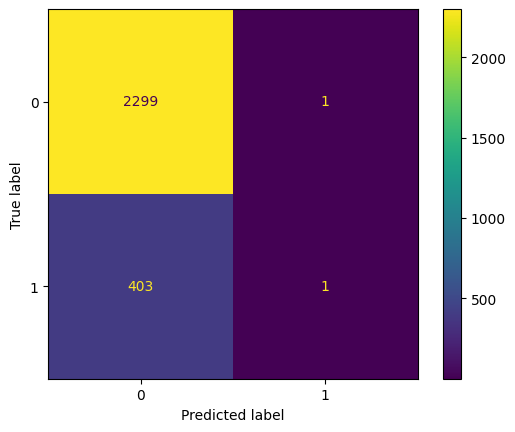

In [17]:
cm = confusion_matrix(y_test, predictions, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logreg.classes_)

disp.plot()
plt.show()

TP = 2324,
FP = 1,
FN = 376,
TN = 3

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2300
           1       0.50      0.00      0.00       404

    accuracy                           0.85      2704
   macro avg       0.68      0.50      0.46      2704
weighted avg       0.80      0.85      0.78      2704



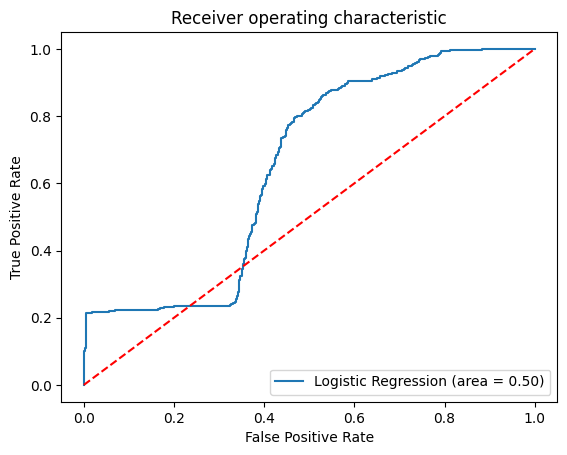

In [20]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

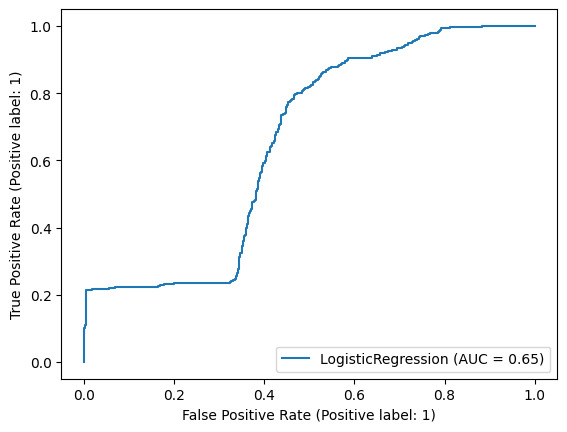

In [21]:
plot_roc_curve(logreg,X_test,y_test);

Using clustering now.

In [22]:
X= df.drop(columns=['FLAG'])
y = df['FLAG']


scaler = StandardScaler()
X = scaler.fit_transform(X)

#Cluster the data with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

#Evaluate the clustering
y_pred = kmeans.labels_
y_true = np.where(df['FLAG'] == 1, 1, 0)

print('Classification Report:\n', classification_report(y_true, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
print('Silhouette Score:', silhouette_score(X, kmeans.labels_))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.02      0.05      7662
           1       0.15      1.00      0.26      1350

    accuracy                           0.17      9012
   macro avg       0.57      0.51      0.16      9012
weighted avg       0.86      0.17      0.08      9012

Confusion Matrix:
 [[ 184 7478]
 [   2 1348]]
Silhouette Score: 0.8788592351547498


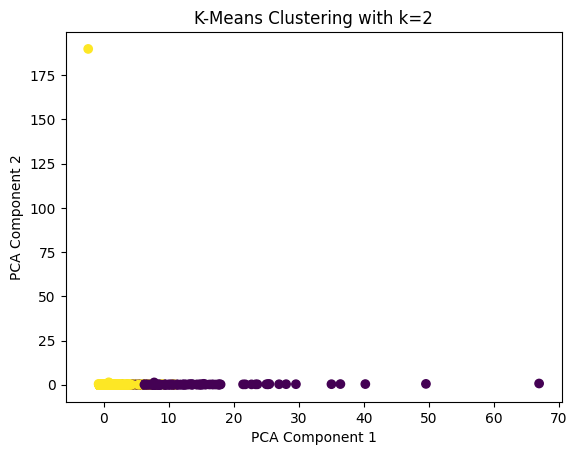

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with k=2')
plt.show()

Trying Random Forest classifier.

In [25]:
#Random Forest classifier.

rf = RandomForestClassifier(n_estimators=250, random_state=42)  # create a Random Forest Classifier object
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2300
           1       0.98      0.90      0.94       404

    accuracy                           0.98      2704
   macro avg       0.98      0.95      0.96      2704
weighted avg       0.98      0.98      0.98      2704



Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2300
           1       0.97      0.95      0.96       404

    accuracy                           0.99      2704
   macro avg       0.98      0.97      0.98      2704
weighted avg       0.99      0.99      0.99      2704



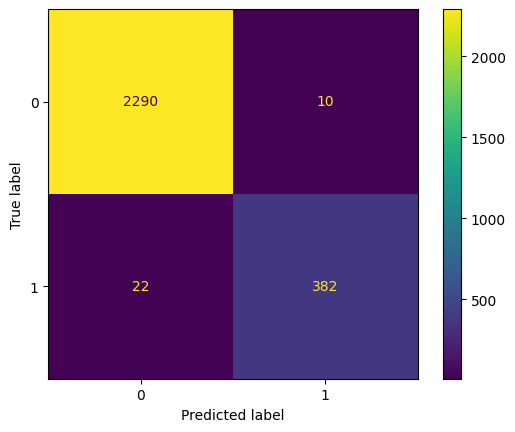

In [26]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgbm.classes_)

disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2300
           1       0.98      0.94      0.96       404

    accuracy                           0.99      2704
   macro avg       0.99      0.97      0.98      2704
weighted avg       0.99      0.99      0.99      2704



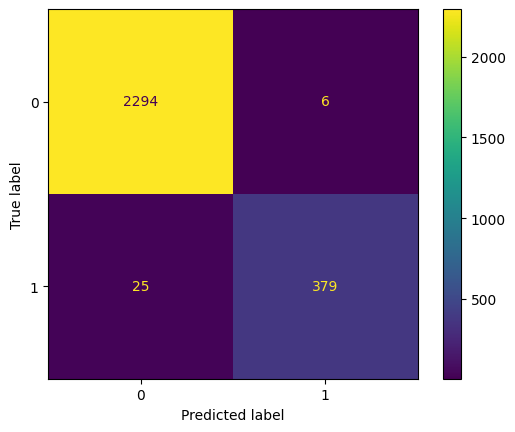

In [27]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()
plt.show()